## Aplicação e interpretação de testes estatísticos para analisar a ataxa de ocupação de imóveis
Projeto com ênfase na modelagem estatística com objetivo de analisar os dados e verificar  quais fatores influenciam a taxa de ocupação de imóveis em bairros de uma cidade usando métodos paramétricos.

Problema:
**Quais fatores mais influenciam na taxa de ocupação de imóveis?**

### Bibliotecas utilizadas

In [3]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split

# Import para padronização dos dados
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#### Leitura dos dados

In [4]:
dados = pd.read_csv('/home/priscila/Downloads/1-Mat/dados/dataset_imoveis.csv')
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   numero_medio_quartos_por_residencia  500 non-null    float64
 1   idade_media_residencias              500 non-null    float64
 2   taxa_criminalidade                   500 non-null    float64
 3   proporcao_lotes                      500 non-null    float64
 4   proporcao_empresas                   500 non-null    float64
 5   rio_no_bairro                        500 non-null    int64  
 6   taxa_poluicao                        500 non-null    float64
 7   distancia_centro                     500 non-null    float64
 8   index_acessibilidade                 500 non-null    int64  
 9   imposto_residencial                  500 non-null    int64  
 10  taxa_professores                     500 non-null    float64
 11  consumo_medio_energia           

In [5]:
dados_originais = dados.copy()

#### Resumo estatístico

In [15]:
dados.describe()    

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.282970,68.424600,3.655786,11.500000,11.131740,0.070000,0.554451,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,22.568000
std,0.705421,28.272145,8.644375,23.428739,6.900712,0.255403,0.116550,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,9.235707
min,3.561000,2.900000,0.006340,0.000000,0.460000,0.000000,0.385000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,5.883000,44.225000,0.082598,0.000000,5.130000,0.000000,0.448750,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,17.075000
50%,6.208500,77.150000,0.266005,0.000000,9.125000,0.000000,0.538000,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,21.200000
75%,6.620500,94.100000,3.694070,12.500000,18.100000,0.000000,0.624000,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,25.000000
max,8.780000,100.000000,88.976200,100.000000,27.740000,1.000000,0.871000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Análise da variável alvo (taxa_ocupacao)

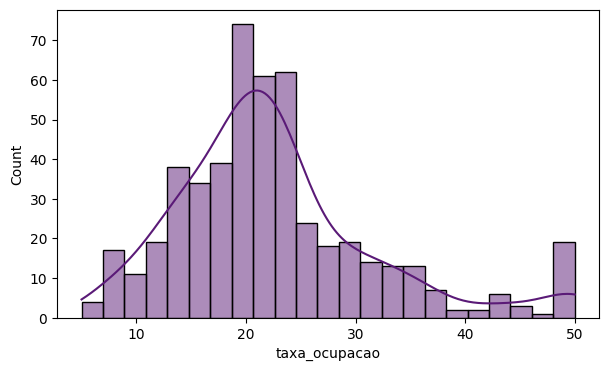

In [17]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_ocupacao, kde = True, color = "#5A1A77")
plt.show()

#### Assimetria das variáveis

Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida. <br> 
Um valor entre 0,5 e 1 ou -0,5 e -1 é moderadamente distorcido. <br>
Um valor entre -0,5 e 0,5 indica que a distribuição é bastante simétrica.

In [18]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
dtype: float64

In [7]:
# Transformação de log
dados['taxa_ocupacao_log'] = np.log(dados['taxa_ocupacao'])

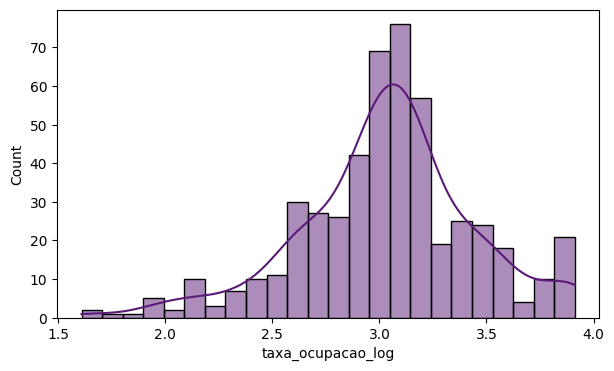

In [21]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_ocupacao_log, kde = True, color = "#5A1A77")
plt.show()

In [22]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
taxa_ocupacao_log                     -0.332872
dtype: float64

#### Correlação

In [45]:
# Correlações mais altas com a variável resposta

dados.corr()['taxa_ocupacao_log'].sort_values(ascending = False)

taxa_ocupacao_log                      1.000000
taxa_ocupacao                          0.953167
numero_medio_quartos_por_residencia    0.632340
consumo_medio_energia                  0.404879
proporcao_lotes                        0.363476
distancia_centro                       0.343079
rio_no_bairro                          0.158163
idade_media_residencias               -0.454326
index_acessibilidade                  -0.487378
taxa_professores                      -0.504358
taxa_poluicao                         -0.511366
taxa_criminalidade                    -0.530713
proporcao_empresas                    -0.542907
imposto_residencial                   -0.565867
taxa_desabrigados                     -0.809567
Name: taxa_ocupacao_log, dtype: float64

In [23]:
dados.corr()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
numero_medio_quartos_por_residencia,1.000000,-0.243044,-0.218919,0.314221,-0.393012,0.092122,-0.303151,0.208031,-0.208559,-0.291159,-0.362163,0.127517,-0.613654,0.696424,0.632340
idade_media_residencias,-0.243044,1.000000,0.355852,-0.568654,0.645526,0.088155,0.731859,-0.747426,0.463883,0.512673,0.258119,-0.276578,0.608452,-0.376758,-0.454326
taxa_criminalidade,-0.218919,0.355852,1.000000,-0.203363,0.407351,-0.057316,0.422339,-0.384391,0.624880,0.581835,0.297472,-0.383776,0.454628,-0.390960,-0.530713
proporcao_lotes,0.314221,-0.568654,-0.203363,1.000000,-0.534292,-0.044375,-0.516414,0.663235,-0.319191,-0.320072,-0.388901,0.178462,-0.417814,0.359733,0.363476
proporcao_empresas,-0.393012,0.645526,0.407351,-0.534292,1.000000,0.063174,0.763810,-0.709502,0.599156,0.724065,0.384794,-0.357710,0.606354,-0.484606,-0.542907
rio_no_bairro,0.092122,0.088155,-0.057316,-0.044375,0.063174,1.000000,0.091835,-0.101685,-0.010326,-0.037972,-0.119013,0.050259,-0.055847,0.174606,0.158163
taxa_poluicao,-0.303151,0.731859,0.422339,-0.516414,0.763810,0.091835,1.000000,-0.770068,0.616414,0.671652,0.188255,-0.381440,0.593524,-0.427432,-0.511366
distancia_centro,0.208031,-0.747426,-0.384391,0.663235,-0.709502,-0.101685,-0.770068,1.000000,-0.505664,-0.543241,-0.226258,0.296059,-0.504135,0.248688,0.343079
index_acessibilidade,-0.208559,0.463883,0.624880,-0.319191,0.599156,-0.010326,0.616414,-0.505664,1.000000,0.909742,0.482377,-0.442594,0.485830,-0.387305,-0.487378
imposto_residencial,-0.291159,0.512673,0.581835,-0.320072,0.724065,-0.037972,0.671652,-0.543241,0.909742,1.000000,0.475243,-0.440226,0.541711,-0.473117,-0.565867


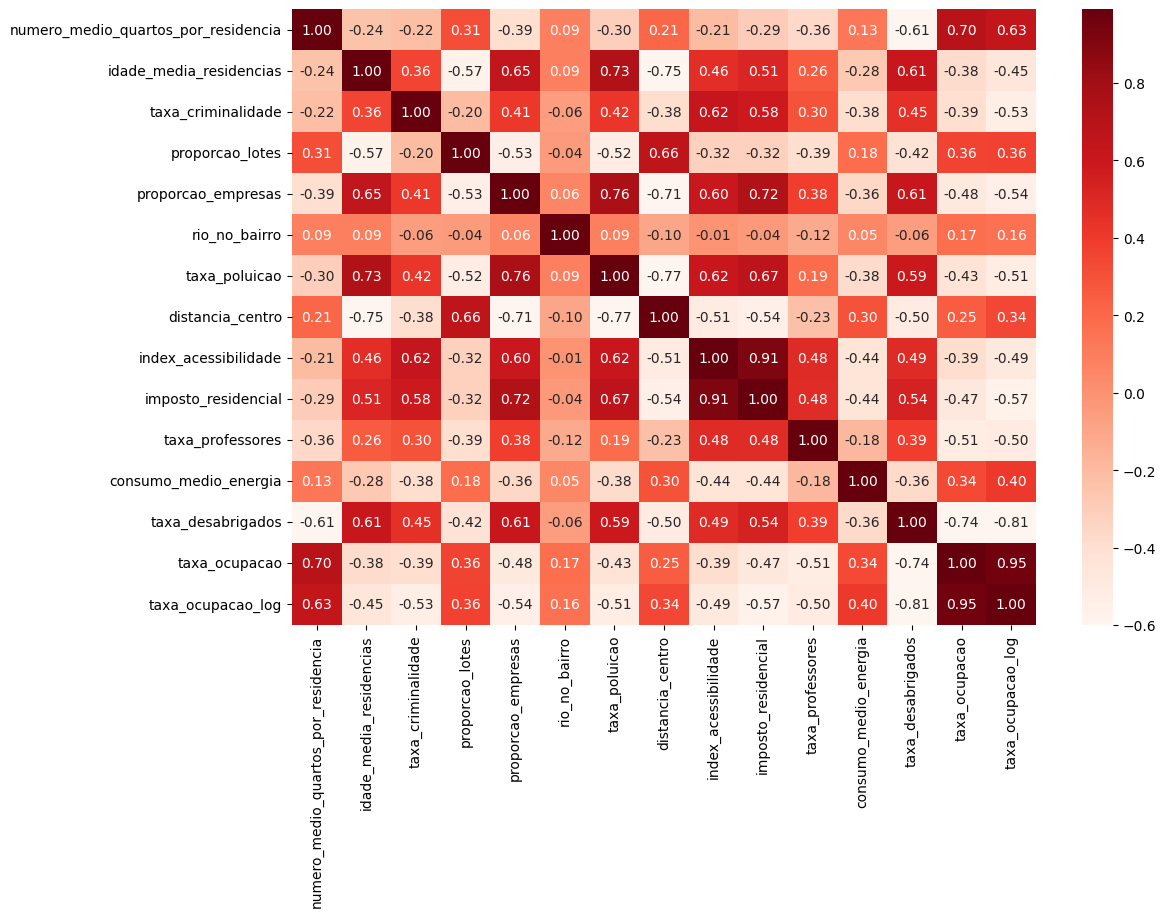

In [24]:
# Tamanho da figura
plt.figure(figsize = (12,8))

# Mapa de calor
# Estamos realçando os valores de correlação entre 0.59 e 0.99, positivo ou negativo.
sns.heatmap(dados.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

Análise:

- Há uma correlação significativa (0,76) entre as variáveis **taxa_poluicao** e **proporcao_empresas**.
- A variável **taxa_poluicao** também apresenta um alto valor de correlação positiva (0,73) com a **idade_media_residencias**, bem como um valor significativamente correlacionado negativamente com a **distancia_centro**.
- A variável **proporcao_empresas** tem um alto valor de correlação com **imposto_residencial**.
- A **taxa_ocupacao** tem um alto valor de correlação com **numero_medio_quartos_por_residencia**, e também significativamente correlacionado negativamente com **taxa_desabrigados**.


#### Analise todas as correlações entre 0.59 e 0.99.

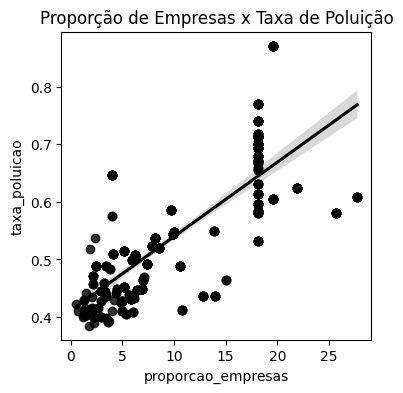

In [36]:
# Scatter Plot 1
plt.figure(figsize = (4, 4))
sns.regplot(x = 'proporcao_empresas', y = 'taxa_poluicao', data = dados, color = 'black' ) 
plt.title('Proporção de Empresas x Taxa de Poluição')
plt.show()

In [32]:
correlacao = pearsonr(dados['proporcao_empresas'], dados['taxa_poluicao'])
print(f'Correlação: {correlacao[0]}')

Correlação: 0.7638104350783939


A taxa de poluição aumenta em bairros com maior proporção de empresas.

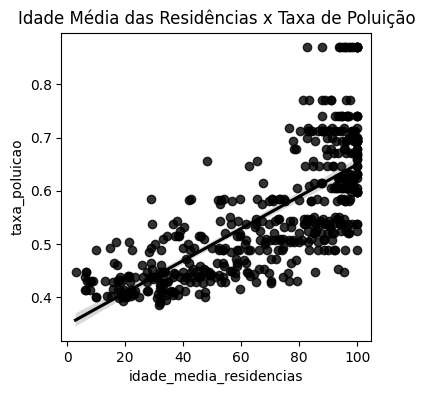

In [38]:
# Scatter Plot 2
plt.figure(figsize = (4, 4))
sns.regplot(x = 'idade_media_residencias', y = 'taxa_poluicao', data = dados, color = 'black') 
plt.title('Idade Média das Residências x Taxa de Poluição')
plt.show()

In [39]:
correlacao = pearsonr(dados['idade_media_residencias'], dados['taxa_poluicao'])
print(f'Correlação: {correlacao[0]}')

Correlação: 0.7318586310142243


**Correlação Positiva**: A taxa de poluição aumenta em bairros com residências de maior idade (construídas há mais tempo).

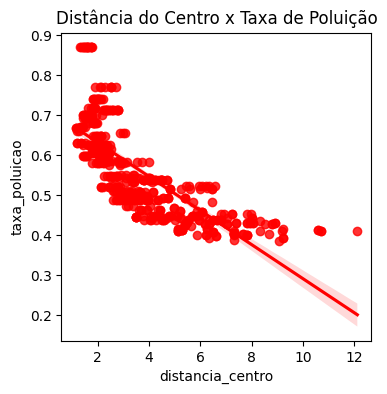

In [43]:
# Scatter Plot 3
plt.figure(figsize = (4, 4))
sns.regplot(x = 'distancia_centro', y = 'taxa_poluicao', data = dados, color = 'red') 
plt.title('Distância do Centro x Taxa de Poluição')
plt.show()

In [42]:
correlacao = pearsonr(dados['distancia_centro'], dados['taxa_poluicao'])
print(f'Correlação: {correlacao[0]}')   

Correlação: -0.7700682232177494


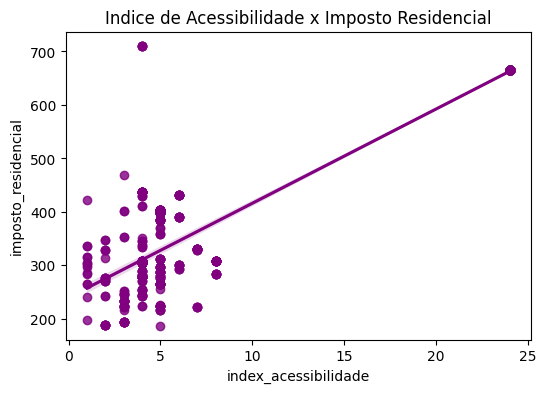

In [ ]:
# Scatter Plot 3
plt.figure(figsize = (6, 4))
sns.regplot(x = 'index_acessibilidade', y = 'imposto_residencial', data = dados, color = 'purple') 
plt.title('Indice de Acessibilidade x Imposto Residencial')
plt.show()  

In [54]:
correlacao = pearsonr(dados['index_acessibilidade'], dados['imposto_residencial'])
print(f'Correlação: {correlacao[0]}')

Correlação: 0.9097418944674467


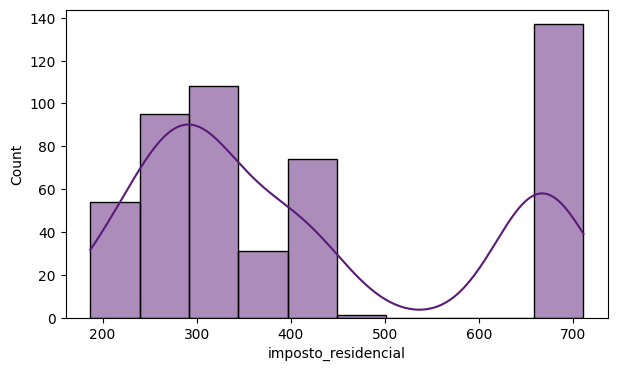

In [56]:
# Histograma imposto residencial
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.imposto_residencial, kde = True, color = "#5A1A77")
plt.show()  

In [57]:
# Removendo outliers (mantemos apenas o que for menor que 600)
df1 = dados[dados['imposto_residencial'] < 600]

print('A Correlação entre as variáveis é:', pearsonr(df1['imposto_residencial'], 
                                                     df1['index_acessibilidade'])[0])

A Correlação entre as variáveis é: 0.23887638770857886


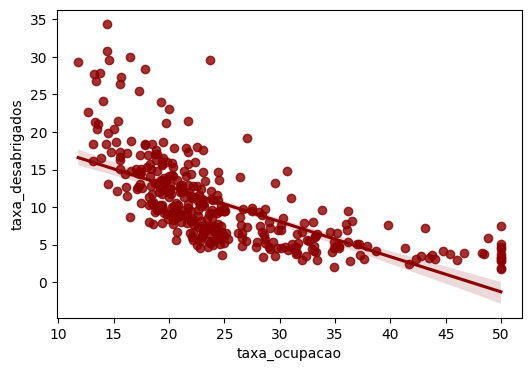

In [70]:
# Scatter Plot 6
plt.figure(figsize = (6, 4))
sns.regplot(x = 'taxa_ocupacao', y = 'taxa_desabrigados', data = df1, color = '#8B0000')
plt.show()

In [71]:
correlacao = pearsonr(dados['taxa_ocupacao'], dados['taxa_desabrigados'])
print(f'Correlação: {correlacao[0]}')

Correlação: -0.7422362776461563


#### Preparação dos dados


In [8]:
Y = dados['taxa_ocupacao_log']
X = dados.drop(columns={'taxa_ocupacao', 'taxa_ocupacao_log'})

In [15]:
# Divisão dos dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 1)

### Modelagem Estatística

#### Interpretando os Elementos da Modelagem Estatística

O relatório de regressão OLS fornece uma variedade de estatísticas e métricas para avaliar a qualidade e a significância do modelo. Aqui estão os elementos-chave do resultado do modelo:

**Dep. Variable (Variável Dependente)**: Indica que a variável que o modelo tenta prever é o logaritmo da taxa de ocupação.

**R-squared (R-quadrado)**: Indica a variação na variável dependente pode ser explicada pelas variáveis independentes incluídas no modelo. É uma medida de quão bem as variáveis independentes conseguem explicar a variável dependente.

**Adj. R-squared (R-quadrado ajustado)**: Ajusta o R-quadrado considerando o número de variáveis no modelo e o número de observações, proporcionando uma medida mais precisa para modelos com muitas variáveis.

**F-statistic (Estatística F)**: É um teste que avalia se há uma relação estatisticamente significativa entre a variável dependente e as variáveis independentes em conjunto.

**Prob (F-statistic)**: É a probabilidade de observar tal valor de estatística F se nenhuma das variáveis independentes tivesse efeito sobre a variável dependente. Um valor muito baixo indica forte evidência contra a hipótese nula (que as variáveis não têm efeito).

**Log-Likelihood (Log de Verossimilhança)**: É uma medida da probabilidade de observar os dados, de acordo com os parâmetros estimados; valores maiores indicam melhor ajuste.

**AIC/BIC:** São critérios de informação que penalizam a complexidade do modelo (número de parâmetros) e favorecem o ajuste do modelo. Ambos servem para comparar modelos; modelos com valores menores são preferidos.

**Df Residuals/Model:** São os graus de liberdade dos resíduos (número de observações menos o número de parâmetros); Df Model indica o número de variáveis independentes.

**Covariance Type**: nonrobust indica que o tipo de cálculo da covariância não foi robusto a certas suposições estatísticas, o que pode afetar a precisão das estimativas de erro padrão.

**Coeficientes (coef)**: Representam o impacto estimado de cada variável independente na variável dependente. 

**std err**: Erro padrão das estimativas dos coeficientes, que ajuda a determinar a precisão das estimativas.

**t e P>|t|**: Estatísticas t e seus valores-p correspondentes testam a hipótese nula de que cada coeficiente é igual a zero. Valores menores de P>|t| indicam que é improvável observar tais dados se a hipótese nula fosse verdadeira.

**[0.025 0.975]**: Intervalos de confiança de 95% para os coeficientes, mostrando a faixa dentro da qual os coeficientes verdadeiros provavelmente caem com 95% de confiança.

**Durbin-Watson:** O teste de Durbin-Watson é usado para detectar a presença de autocorrelação nos resíduos de uma análise de regressão. Ele varia de 0 a 4. Um valor de 2 indica que não há autocorrelação nos resíduos, o que é o ideal, pois sugere que os erros entre as observações são independentes um do outro..

**Omnibus/Prob(Omnibus)**: Testa a normalidade dos resíduos. Com Prob(Omnibus) próximo de zero, há evidência de que os resíduos podem não ser normalmente distribuídos.

**Jarque-Bera (JB)/Prob(JB), Skew, Kurtosis**: São testes adicionais para a normalidade dos resíduos e sua forma. 

Cada um desses elementos ajuda a interpretar a qualidade e a validade do modelo de regressão estimado. É raro conseguir consenso entre todas as estatísticas.

In [13]:
X_treino_const = sm.add_constant(X_treino)

In [16]:
# Cria o modelo
modelo_v1 = sm.OLS(y_treino, X_treino_const).fit()

In [17]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     120.5
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          5.52e-127
Time:                        16:06:59   Log-Likelihood:                 111.52
No. Observations:                 400   AIC:                            -195.0
Df Residuals:                     386   BIC:                            -139.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.0295      0.227     17.766      0.000       3.584       4.475
numero_medio_quartos_por_residencia     0.0952      0.019      5.035      0.000       0.058       0.132
idade_media_residencias                 0.0009      0.001      1.607      0.109      -0.000       0.002
taxa_criminalidade                     -0.0102      0.001     -7.713      0.000      -0.013      -0.008
proporcao_lotes                         0.0015      0.001      2.372      0.018       0.000       0.003
proporcao_empresas                      0.0017      0.003      0.628      0.530      -0.004       0.007
rio_no_bairro                           0.0895      0.036      2.477      0.014       0.018       0.161
taxa_poluicao                          -0.7708      0.167     -4.628      0.000      -1.098      -0.443
distancia_centro                       -0.0462      0.009     -5.221      0.000      -0.064      -0.029
index_acessibilidade                    0.0135      0.003      4.409      0.000       0.007       0.019
imposto_residencial                    -0.0006      0.000     -3.599      0.000      -0.001      -0.000
taxa_professores                       -0.0338      0.006     -5.678      0.000      -0.046      -0.022
consumo_medio_energia                   0.0002      0.000      2.048      0.041    9.67e-06       0.000
taxa_desabrigados                      -0.0308      0.002    -13.331      0.000      -0.035      -0.026
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.106
Skew:                           0.616   Prob(JB):                     1.90e-37
Kurtosis:                       5.938   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A segunda nota indica multicolinearidade

In [18]:
modelo_v1.params

const                                  4.029452
numero_medio_quartos_por_residencia    0.095247
idade_media_residencias                0.000948
taxa_criminalidade                    -0.010173
proporcao_lotes                        0.001451
proporcao_empresas                     0.001684
rio_no_bairro                          0.089488
taxa_poluicao                         -0.770793
distancia_centro                      -0.046237
index_acessibilidade                   0.013476
imposto_residencial                   -0.000623
taxa_professores                      -0.033816
consumo_medio_energia                  0.000242
taxa_desabrigados                     -0.030751
dtype: float64

## Verificando a Multicolinearidade com VIF

Em seguida, verificaremos a multicolinearidade no conjunto de dados de treino. Utilizaremos o Variance Inflation Factor (VIF), para verificar se há multicolinearidade nos dados.

O Variance Inflation Factor (VIF) é uma medida que quantifica o quanto a variância de um estimador de regressão (coeficiente) é aumentada devido à multicolinearidade na regressão múltipla. A multicolinearidade ocorre quando há correlações altas entre duas ou mais variáveis explicativas (independentes) em um modelo de regressão, o que pode dificultar a estimação dos coeficientes da regressão com precisão.

Variáveis com score (pontuação) VIF > 5 serão descartados/tratados até que todos os recursos tenham pontuação VIF < 5.

In [19]:
# Função para checar o VIF de todas as variáveis
def verifica_vif(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [20]:
# Estamos verificando o VIF sem a constante requerida pelo Statsmodels
print(verifica_vif(X_treino))

                                feature        VIF
0   numero_medio_quartos_por_residencia  79.891041
1               idade_media_residencias  21.999229
2                    taxa_criminalidade   1.986129
3                       proporcao_lotes   2.995889
4                    proporcao_empresas  14.274312
5                         rio_no_bairro   1.163134
6                         taxa_poluicao  72.198368
7                      distancia_centro  15.124267
8                  index_acessibilidade  16.869623
9                   imposto_residencial  66.888831
10                     taxa_professores  89.425493
11                consumo_medio_energia  20.530499
12                    taxa_desabrigados  11.856588


### Padronização dos Dados

In [21]:
# Cria o padronizador
scaler = StandardScaler()

# Fit e transform em treino
X_treino_scaled = scaler.fit_transform(X_treino)

In [22]:
# Transform em teste
X_teste_scaled = scaler.transform(X_teste)

### Modelagem Estatística - Segunda Versão 

Aqui usaremos os dados padronizados (na mesma escala).

In [23]:
# Adiciona a constante (obrigatório para modelos criados com Statsmodels)
X_treino_const = sm.add_constant(X_treino_scaled)

In [24]:
# Criando a segunda versão do modelo
modelo_v2 = sm.OLS(y_treino, X_treino_const).fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     120.5
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          5.52e-127
Time:                        16:13:18   Log-Likelihood:                 111.52
No. Observations:                 400   AIC:                            -195.0
Df Residuals:                     386   BIC:                            -139.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.009    326.592      0.000       3.025       3.062
x1             0.0668      0.013      5.035      0.000       0.041       0.093
x2             0.0269      0.017      1.607      0.109      -0.006       0.060
x3            -0.0940      0.012     -7.713      0.000      -0.118      -0.070
x4             0.0343      0.014      2.372      0.018       0.006       0.063
x5             0.0116      0.018      0.628      0.530      -0.025       0.048
x6             0.0239      0.010      2.477      0.014       0.005       0.043
x7            -0.0906      0.020     -4.628      0.000      -0.129      -0.052
x8            -0.0987      0.019     -5.221      0.000      -0.136      -0.062
x9             0.1180      0.027      4.409      0.000       0.065       0.171
x10           -0.1059      0.029     -3.599      0.000      -0.164      -0.048
x11           -0.0731      0.013     -5.678      0.000      -0.098      -0.048
x12            0.0220      0.011      2.048      0.041       0.001       0.043
x13           -0.2191      0.016    -13.331      0.000      -0.251      -0.187
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.106
Skew:                           0.616   Prob(JB):                     1.90e-37
Kurtosis:                       5.938   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:
    
- O R-Squared é praticamente o mesmo indicando que o modelo tem boa performance. Vamos então checar o VIF.

In [25]:
# Converte o array NumPy para dataframe do Pandas (requerido para o VIF)
df_X_treino = pd.DataFrame(X_treino_scaled)
print(verifica_vif(df_X_treino))

    feature       VIF
0         0  2.028621
1         1  3.216635
2         2  1.708968
3         3  2.409812
4         4  3.920927
5         5  1.074111
6         6  4.415409
7         7  4.114200
8         8  8.242494
9         9  9.966244
10       10  1.906999
11       11  1.330456
12       12  3.109482


In [26]:
df_X_treino = pd.DataFrame(X_treino_scaled, columns = ['numero_medio_quartos_por_residencia',
                                                       'idade_media_residencias',
                                                       'taxa_criminalidade',
                                                       'proporcao_lotes',
                                                       'proporcao_empresas', 
                                                       'rio_no_bairro',
                                                       'taxa_poluicao',
                                                       'distancia_centro',
                                                       'index_acessibilidade', 
                                                       'imposto_residencial', 
                                                       'taxa_professores',
                                                       'consumo_medio_energia', 
                                                       'taxa_desabrigados'])

In [27]:
print(verifica_vif(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  2.028621
1               idade_media_residencias  3.216635
2                    taxa_criminalidade  1.708968
3                       proporcao_lotes  2.409812
4                    proporcao_empresas  3.920927
5                         rio_no_bairro  1.074111
6                         taxa_poluicao  4.415409
7                      distancia_centro  4.114200
8                  index_acessibilidade  8.242494
9                   imposto_residencial  9.966244
10                     taxa_professores  1.906999
11                consumo_medio_energia  1.330456
12                    taxa_desabrigados  3.109482


Análise:

- As variáveis index_acessibilidade e imposto_residencial apresentam um VIF maior que 5, indicando multicolinearidade. Vamos remover as variáveis.


- O VIF precisa ser calculado somente com dados de treino. 

In [28]:
del df_X_treino["index_acessibilidade"]
del df_X_treino["imposto_residencial"]

In [29]:
# Convertemos o array de teste em dataframe de teste
df_X_teste = pd.DataFrame(X_teste_scaled, columns = ['numero_medio_quartos_por_residencia',
                                                     'idade_media_residencias',
                                                     'taxa_criminalidade',
                                                     'proporcao_lotes',
                                                     'proporcao_empresas', 
                                                     'rio_no_bairro',
                                                     'taxa_poluicao',
                                                     'distancia_centro',
                                                     'index_acessibilidade', 
                                                     'imposto_residencial', 
                                                     'taxa_professores',
                                                     'consumo_medio_energia', 
                                                     'taxa_desabrigados'])
del df_X_teste["index_acessibilidade"]
del df_X_teste["imposto_residencial"]

In [30]:
print(verifica_vif(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  1.944437
1               idade_media_residencias  3.190144
2                    taxa_criminalidade  1.436394
3                       proporcao_lotes  2.250999
4                    proporcao_empresas  3.289783
5                         rio_no_bairro  1.057753
6                         taxa_poluicao  3.815908
7                      distancia_centro  4.113862
8                      taxa_professores  1.517930
9                 consumo_medio_energia  1.291092
10                    taxa_desabrigados  3.106567


Análise:

- Conseguimos remover a multicolinearidade do dataset e assim atendemos a uma das suposições da regressão linear.

In [32]:
# Converte o dataframe de volta para o formato NumPy
X_treino_scaled = df_X_treino.to_numpy()
# Converte o dataframe de volta para o formato NumPy
X_teste_scaled = df_X_teste.to_numpy()

### Modelagem Estatística - Terceira Versão 

Aqui usaremos os dados padronizados e sem as variáveis multicolineares.

In [33]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_scaled)

In [35]:
# Cria o modelo
modelo_v3 = sm.OLS(y_treino, X_treino_const).fit()
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.6
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          5.03e-125
Time:                        16:30:10   Log-Likelihood:                 101.69
No. Observations:                 400   AIC:                            -179.4
Df Residuals:                     388   BIC:                            -131.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    319.489      0.000       3.025       3.062
x1             0.0768      0.013      5.784      0.000       0.051       0.103
x2             0.0213      0.017      1.251      0.212      -0.012       0.055
x3            -0.0808      0.011     -7.073      0.000      -0.103      -0.058
x4             0.0255      0.014      1.786      0.075      -0.003       0.054
x5            -0.0101      0.017     -0.584      0.560      -0.044       0.024
x6             0.0288      0.010      2.937      0.004       0.010       0.048
x7            -0.0804      0.019     -4.319      0.000      -0.117      -0.044
x8            -0.0988      0.019     -5.111      0.000      -0.137      -0.061
x9            -0.0643      0.012     -5.477      0.000      -0.087      -0.041
x10            0.0185      0.011      1.706      0.089      -0.003       0.040
x11           -0.2171      0.017    -12.929      0.000      -0.250      -0.184
==============================================================================
Omnibus:                       61.536   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.597
Skew:                           0.655   Prob(JB):                     1.86e-46
Kurtosis:                       6.304   Cond. No.                         5.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:

- O R2 caiu um pouco, mas ainda temos ótima performance.

- Variáveis x2, x5 e x10 apresentaram valor-p muito maior que 0.05. Logo, não parecem significantes para o modelo e vamos removê-las.

In [37]:
# Removemos as colunas de índice 1, 4 e 9 em treino
X_treino_clean = np.delete(X_treino_scaled, [1, 4, 9], axis = 1)
# Removemos as colunas de índice 1, 4 e 9 em teste
X_teste_clean = np.delete(X_teste_scaled, [1, 4, 9], axis = 1)

### Modelagem Estatística - Quarta Versão 

Aqui usaremos os dados padronizados, sem as variáveis multicolineares e sem as variáveis com baixa significância para explicar a variável alvo.

In [38]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_clean)

In [39]:
# Cria o modelo
modelo_v4 = sm.OLS(y_treino, X_treino_const).fit()
modelo_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     183.3
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          3.17e-127
Time:                        16:32:05   Log-Likelihood:                 98.927
No. Observations:                 400   AIC:                            -179.9
Df Residuals:                     391   BIC:                            -143.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    318.514      0.000       3.025       3.062
x1             0.0796      0.013      6.157      0.000       0.054       0.105
x2            -0.0855      0.011     -7.629      0.000      -0.108      -0.063
x3             0.0223      0.014      1.573      0.116      -0.006       0.050
x4             0.0300      0.010      3.063      0.002       0.011       0.049
x5            -0.0844      0.016     -5.202      0.000      -0.116      -0.053
x6            -0.1040      0.018     -5.794      0.000      -0.139      -0.069
x7            -0.0666      0.011     -5.905      0.000      -0.089      -0.044
x8            -0.2133      0.015    -13.938      0.000      -0.243      -0.183
==============================================================================
Omnibus:                       57.577   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.212
Skew:                           0.627   Prob(JB):                     3.67e-41
Kurtosis:                       6.099   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:

- O valor do R2 é quase o mesmo. Precisamos remover a variável x3 pois apresenta o p-valor maior que 0,05.

In [42]:
# Removemos a coluna de índice 2 em treino
X_treino_clean2 = np.delete(X_treino_clean, [2], axis = 1)

# Removemos a coluna de índice 2 em teste
X_teste_clean2 = np.delete(X_teste_clean, [2], axis = 1)

### Modelagem Estatística - Quinta Versão do Modelo

Aqui usaremos os dados padronizados, sem as variáveis multicolineares e sem as variáveis com baixa significância para explicar a variável alvo.

In [43]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_clean2)

In [44]:
# Cria o modelo
modelo_v5 = sm.OLS(y_treino, X_treino_const).fit()
modelo_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     208.3
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          7.24e-128
Time:                        16:35:01   Log-Likelihood:                 97.665
No. Observations:                 400   AIC:                            -179.3
Df Residuals:                     392   BIC:                            -147.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    317.916      0.000       3.025       3.062
x1             0.0829      0.013      6.491      0.000       0.058       0.108
x2            -0.0827      0.011     -7.458      0.000      -0.104      -0.061
x3             0.0297      0.010      3.026      0.003       0.010       0.049
x4            -0.0838      0.016     -5.155      0.000      -0.116      -0.052
x5            -0.0889      0.015     -5.849      0.000      -0.119      -0.059
x6            -0.0715      0.011     -6.579      0.000      -0.093      -0.050
x7            -0.2131      0.015    -13.900      0.000      -0.243      -0.183
==============================================================================
Omnibus:                       61.760   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.712
Skew:                           0.675   Prob(JB):                     2.61e-44
Kurtosis:                       6.197   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:

- O valor do R2 é quase o mesmo, mas agora sem variáveis multicolineares e sem variáveis irrelevantes.


- Concluímos a modelagem estatística e temos as melhores variáveis para prever a variável alvo.


## Validação das Suposições da Regressão Linear


**1- Linearidade**

**2- Independência dos Erros**

**3- Homocedasticidade**

**4- Normalização dos Erros**

**5- Sem Multicolinearidade**

Usaremos a última versão do modelo para fazer as validações.

### 1- Linearidade

Uma das suposições cruciais que testamos ao construir modelos baseados em mínimos quadrados ordinários ou regressões lineares é a linearidade nos parâmetros. 

A linearidade simplesmente implica que nossa variável dependente (Y) pode ser expressa como uma função linear das variáveis explicativas (X) que estamos escolhendo para explicar a variação na variável Y. Observe que o termo 'regressão linear' enfatiza a importância da suposição de linearidade.

A regressão linear precisa que a relação entre as variáveis independentes e dependentes seja linear. Também é importante verificar se há valores discrepantes, pois a regressão linear é sensível a efeitos extremos. A suposição de linearidade pode ser melhor testada com gráficos de dispersão ou usando o teste linear_rainbow.

O teste linear_rainbow é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Ele é chamado de "rainbow" porque ele usa vários valores de corte para dividir os dados em grupos e comparar os resíduos desses grupos. Se os resíduos dos grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

Para realizar o teste linear_rainbow com statsmodels, você pode usar o método linear_rainbow(). 

Para interpretar o resultado, você pode comparar o valor-p (resultado do teste) com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0 (Hipótese Nula). Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita.


* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

In [57]:
# Função para automatizar a validação da suposição 1.

# Função
def valida_linearidade(modelo):
    
    # Aplica o linear_rainbow
    lin_p = sms.linear_rainbow(modelo, frac = 0.5)[1]
    print(lin_p)
    
    # Inicializa a variável com Falha
    result = "Rejeitamos a H0 (Hipótese Nula). Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita."
    
    # Testa o resultado
    if lin_p > 0.05:
        result = "Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita."
        
    print(result)
    
    

In [58]:
valida_linearidade(modelo_v5)

0.7311264246842837
Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.


**Análise:**

Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

### 2- Independência dos Erros

Na regressão linear, a suposição de independência dos erros é a suposição de que os erros (resíduos) são independentes entre si. Isso significa que o valor de um erro não deve ser afetado pelo valor de qualquer outro erro.

Essa suposição é importante porque ela é necessária para que o cálculo dos intervalos de confiança e dos valores-p dos parâmetros seja preciso. Se a suposição de independência dos erros não for satisfeita, os intervalos de confiança e os valores-p podem ser imprecisos ou enganosos.

Para verificar se a suposição de independência dos erros está sendo satisfeita, você pode plotar um gráfico de resíduos versus tempo (se os dados forem observações ao longo do tempo) e verificar se há algum padrão evidente. Você também pode usar um teste estatístico, como o Teste de Durbin-Watson, para verificar se a suposição de independência dos erros está sendo satisfeita. Se a suposição de independência dos erros não for satisfeita, você pode tentar usar um modelo de regressão diferente ou incluir variáveis adicionais no modelo para controlar o efeito da dependência dos erros.

Para testar a suposição, plotaremos os resíduos e os valores ajustados em um gráfico e garantiremos que os resíduos não formem um padrão forte. Eles devem ser aleatoriamente e uniformemente espalhados no eixo x.

In [49]:
residuals = modelo_v5.resid

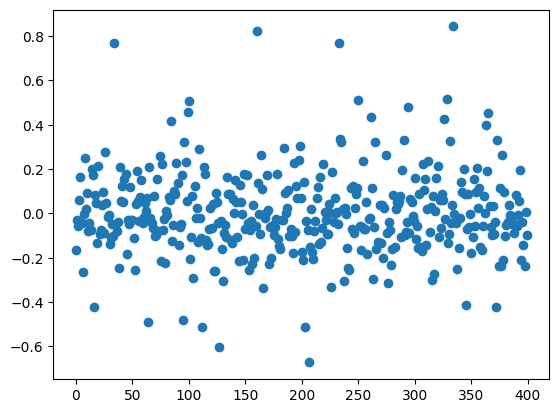

In [50]:
plt.scatter(range(len(X_treino_clean2)), residuals);

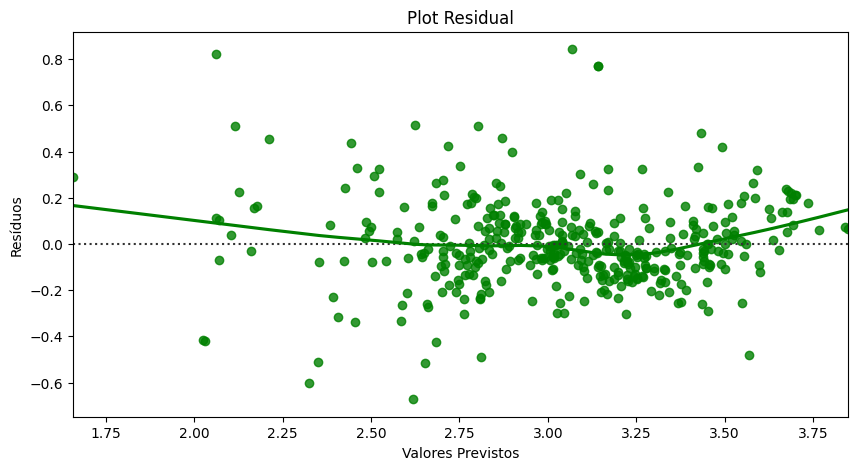

In [51]:
# Valores previstos
valores_previstos = modelo_v5.fittedvalues

# Plot
plt.figure(figsize = (10,5))
sns.residplot(x = valores_previstos, y = residuals, color = "green", lowess = True)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Plot Residual")
plt.show()

**Análise:**

- A média dos resíduos é muito próxima de 0, portanto, a suposição para os resíduos é satisfeita. Os resíduos são plotados aleatoriamente em torno de 0.
- Os resíduos "saltam aleatoriamente" em torno da linha 0. Isso sugere que não há autocorrelação.
- Os resíduos formam aproximadamente uma "faixa horizontal" em torno da linha 0. Isso sugere que as variâncias dos termos de erro são iguais.
- Nenhum resíduo "se destaca" do padrão aleatório básico de resíduos. Isso sugere que não há outliers.

O Teste de Durbin-Watson é um teste estatístico que verifica se a suposição de independência dos erros está sendo satisfeita em um modelo de regressão linear. Esse teste é especialmente útil quando os dados são observações ao longo do tempo, pois pode detectar autocorrelação nos erros.

Para aplicar o Teste de Durbin-Watson com statsmodels, você pode usar o método durbin_watson(). Esse método retorna um valor entre 0 e 4, onde valores próximos de 0 indicam autocorrelação positiva nos erros e valores próximos de 4 indicam autocorrelação negativa nos erros. Valores próximos de 2 indicam ausência de autocorrelação nos erros.

In [53]:
# Vamos construir uma função para automatizar a validação da suposição 2.

# Função
def valida_independencia(residuos):
    
    import statsmodels
    
    # Define o modelo
    resultado = statsmodels.stats.stattools.durbin_watson(residuos)
    
    print('Resultado do teste:', resultado)
    
    # Interprete o resultado
    if resultado < 1.9:
        print("Há evidências de autocorrelação positiva nos erros! Suposição não satisfeita!")
    elif resultado > 2.1:
        print("Há evidências de autocorrelação negativa nos erros! Suposição não satisfeita!")
    else:
        print("Não há evidências de autocorrelação nos erros! Suposição satisfeita!")

In [54]:
valida_independencia(residuals)

Resultado do teste: 2.013960439087898
Não há evidências de autocorrelação nos erros! Suposição satisfeita!


### 3- Homocedasticidade

A suposição de homocedasticidade (que significa “mesma variância”) é fundamental para os modelos de regressão linear. A homocedasticidade descreve uma situação em que o termo de erro (ou seja, o “ruído” ou perturbação aleatória na relação entre as variáveis independentes e a variável dependente) é o mesmo em todos os valores das variáveis independentes. 

A heterocedasticidade (a violação da homocedasticidade) está presente quando o tamanho do termo de erro difere entre os valores de uma variável independente. O impacto da violação do pressuposto da homocedasticidade é uma questão de grau, aumentando à medida que a heterocedasticidade aumenta.

Homocedasticidade - Se os resíduos forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados homocedásticos (a variabilidade é igual entre os valores de uma variável explicativa).

Heterocedasticidade - Se os resíduos não forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados heterocedásticos. Nesse caso, os resíduos podem ter uma forma de funil ou qualquer outra forma não simétrica.

**Resumindo:**

**A homocedasticidade é a propriedade de uma distribuição de dados em que a variabilidade dos dados é constante em todos os níveis de uma variável. Em outras palavras, a homocedasticidade ocorre quando os dados possuem uma variação constante em relação a uma determinada variável. Isso é diferente da heterocedasticidade, que ocorre quando a variabilidade dos dados é diferente em diferentes níveis da variável.**

**A homocedasticidade é importante em análises estatísticas porque alguns testes estatísticos pressupõem que os dados são homocedásticos. Se os dados não são homocedásticos, os resultados do teste podem ser imprecisos ou enganosos.**

Usaremos o Teste de Goldfeldquandt para testar a seguinte hipótese com alfa = 0,05

- Hipótese nula (H0): Há evidências de heterocedasticidade (a regressão não é homocedástica).

- Hipótese alternativa (H1): Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica).

Nosso teste deve rejeitar a H0.

O Teste de Goldfeld-Quandt é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Esse teste é realizado dividindo os dados em dois grupos e comparando os resíduos dos dois grupos. Se os resíduos dos dois grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos dois grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

Para realizar o Teste de Goldfeld-Quandt com statsmodels, você pode usar o método het_goldfeldquandt(). 

Para interpretar o resultado, você pode comparar o valor-p com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. 


* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0. isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

O problema que a heterocedasticidade apresenta para modelos de regressão é simples. Lembre-se de que a regressão de mínimos quadrados ordinários (OLS) procura minimizar os resíduos e, por sua vez, produzir os menores erros padrão possíveis. Por definição, a regressão OLS dá peso igual a todas as observações, mas quando a heterocedasticidade está presente, os casos com maiores perturbações têm mais “atração” do que outras observações. Nesse caso, a regressão de mínimos quadrados ponderada seria mais apropriada, pois reduz o peso das observações com perturbações maiores.

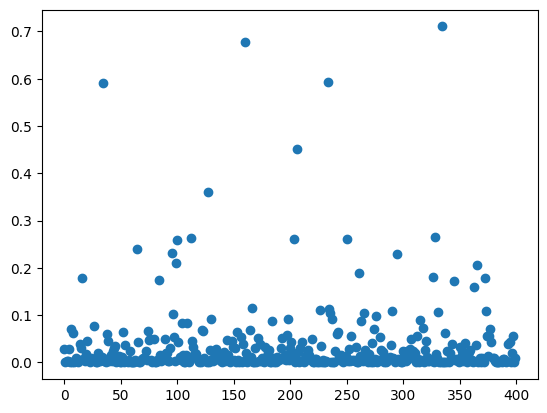

In [59]:
# Resíduos
residuals = modelo_v5.resid

# Plot
plt.scatter(range(len(X_treino_clean2)),np.square(residuals));

Como o gráfico não apresenta padrão, podemos concluir que não há heterocedasticidade. Mas vamos aplicar um teste estatístico.

In [60]:
# Função
def valida_heterocedasticidade(y, x):
    
    # Estatísticas
    estatisticas = ["F statistic", "p-value"]
    
    # Teste
    teste_goldfeldquandt = sms.het_goldfeldquandt(y, x)
    
    resultado = lzip(estatisticas, teste_goldfeldquandt)
    
    pval = resultado[1][1]
    
    if pval < 0.05:
        print("Há evidências de heterocedasticidade (a regressão não é homocedástica) e rejeitamos a H0. Suposição não satisfeita!")
    else:
        print("Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!")

In [61]:
valida_heterocedasticidade(y_treino, X_treino_clean2)

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!


**Análise:**

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!

### 4- Normalização dos Erros

Normalidade dos termos de erro. Os resíduos devem ser normalmente distribuídos.

Essa suposição pode ser melhor verificada com um histograma ou um Q-Q-Plot. 

Na regressão linear, a suposição de normalização dos resíduos é a suposição de que os resíduos (erros) da regressão seguem uma distribuição normal. Isso significa que os resíduos devem ter uma média zero e uma variância constante.

Essa suposição é importante porque alguns testes estatísticos e métodos de estimação de parâmetros pressupõem que os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, os resultados desses testes e métodos podem ser imprecisos ou enganosos.

Para verificar se os resíduos seguem uma distribuição normal, você pode plotar um gráfico de resíduos e observar se os resíduos seguem uma distribuição normal. Você também pode usar um teste de normalidade, como o Teste de Shapiro-Wilk, para verificar se os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, você pode tentar transformar os dados ou usar um modelo de regressão diferente.

In [ ]:
residuals = modelo_v5.resid

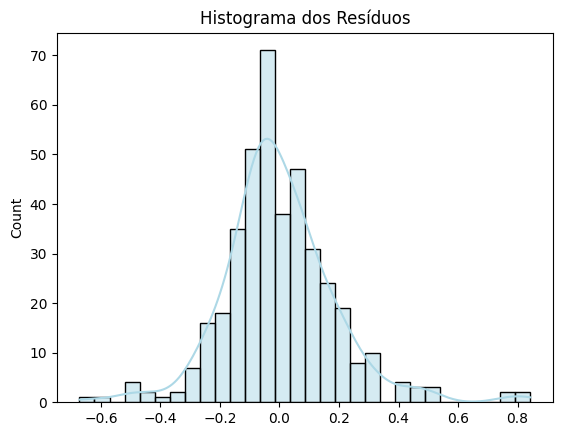

In [64]:
# Histograma dos resíduos
sns.histplot(residuals, kde = True, color = 'lightblue')
plt.title('Histograma dos Resíduos')
plt.show()

QQ Plot

Um gráfico qq (quantile-quantile) é um gráfico que é usado para comparar duas distribuições de dados. Ele é chamado de "qq" porque ele compara os quantis das duas distribuições. Os quantis são os valores que dividem os dados em partes iguais. Por exemplo, o primeiro quartil é o valor que divide os dados em um quarto menor e três quartos maiores.

Para interpretar um gráfico qq, você deve observar se os pontos seguem uma linha diagonal. Se os pontos seguirem uma linha diagonal, isso indica que as duas distribuições são similares. Se os pontos não seguirem uma linha diagonal, isso indica que as duas distribuições são diferentes.

Um gráfico qq é útil para verificar se os dados seguem uma distribuição específica, como a distribuição normal. Se os dados seguirem uma distribuição normal, os pontos no gráfico qq devem seguir uma linha diagonal. Se os pontos não seguirem uma linha diagonal, isso pode indicar que os dados não seguem uma distribuição normal.

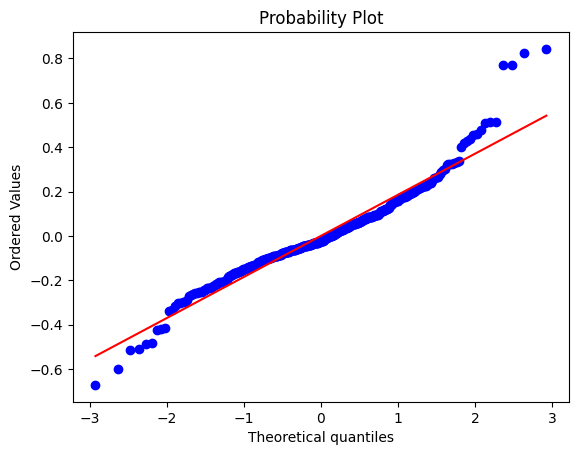

In [65]:
# QQ Plot
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

**Análise:**

Os resíduos seguem praticamente uma distribuição normal. A suposição estaria satisfeita. Vamos aplicar o Teste de Shapiro-Wilk aos resíduos para confirmar.

Para interpretar o resultado do teste, você pode comparar o valor-p com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal. 

* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0. Isso indica que os resíduos seguem uma distribuição normal.

In [67]:
# Função
def valida_normresiduos(residuos):
    
    from scipy.stats import shapiro
    
    # Aplica o teste
    resultado = shapiro(residuos)
    
    # Extrai o valor-p
    pval = resultado.pvalue
    
    print('Valor-p =', pval)
    
    if pval < 0.05:
        print("Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!")
    else:
        print("Falhamos em rejeitar a H0. Isso indica que os resíduos seguem uma distribuição normal. Suposição satisfeita!")

In [68]:
valida_normresiduos(residuals)

Valor-p = 1.2627780234323305e-10
Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!


**Análise:**

Os resíduos não passaram no teste de normalidade. Provavelmente a diferença é pouca, mas essa suposição não foi satisfeita.

Notas:

1- Nem a variável dependente nem a variável independente precisam ser normalmente distribuídas. Na verdade, elas podem ter todos os tipos de distribuições. A suposição de normalidade se aplica à distribuição dos erros.

2- Às vezes, a não normalidade dos resíduos indica a presença de outliers. Se for esse o caso, é preciso lidar com os valores discrepantes primeiro.

3- Talvez usar algumas transformações resolva o problema, porém, tem consequências. Como a interpretação dos coeficientes muda se transformarmos variáveis.

4- Eu não diria que esse modelo linear é completamente inútil. No entanto, isso significa que o modelo não explica corretamente/completamente os dados. Há uma parte em que você precisa decidir se o modelo é "bom o suficiente" ou não.

5- Modelos com superajustes (overfitting), podem apresentar resíduos não normais.

O ideal é retornar e trabalhar mais nos dados e/ou no modelo e checar novamente as suposições, mas este artigo abaixo traz uma discussão interessante sobre o tema e afirma que o teste t e a regressão linear de mínimos quadrados não requerem nenhuma suposição de distribuição Normal em amostras suficientemente grandes (Big Data).

https://www.annualreviews.org/doi/full/10.1146/annurev.publhealth.23.100901.140546

In [69]:
# Função para checar o VIF de todas as variáveis
def valida_multicolinearidade(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [70]:
print(valida_multicolinearidade(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  1.944437
1               idade_media_residencias  3.190144
2                    taxa_criminalidade  1.436394
3                       proporcao_lotes  2.250999
4                    proporcao_empresas  3.289783
5                         rio_no_bairro  1.057753
6                         taxa_poluicao  3.815908
7                      distancia_centro  4.113862
8                      taxa_professores  1.517930
9                 consumo_medio_energia  1.291092
10                    taxa_desabrigados  3.106567


**Análise:**

Não há multicolinearidade nos dados. Suposição satisfeita.